# Funciones de transferencia en Python

Dentro de las utilidades de la libreria SciPy, se pueden encontrar algunas herramientas para el manejo de funciones de transferencia.

## Importar librerias auxiliares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 1.- Creación de funciones de transferencia

Una función de transferencia puede ser creada tras definir los coeficientes de su numerador y denominador, por medio de la función **TransferFunction()**.

In [2]:
#Para crear funciones de transferencia en continuo
num = [1,0,5]
den = [1,2,3,1]
f1 = signal.TransferFunction(num, den)
print(f1)
f2 = signal.TransferFunction(num, den, dt=0.1)
print(f2)


TransferFunctionContinuous(
array([1., 0., 5.]),
array([1., 2., 3., 1.]),
dt: None
)
TransferFunctionDiscrete(
array([1., 0., 5.]),
array([1., 2., 3., 1.]),
dt: 0.1
)


Una vez creada, los objetos de la clase **TransferFunction** poseen varios métodos auxiliares para conocer las propiedades de la función.

Los polos de f1 son: 
[-0.78492015+1.30714128j -0.78492015-1.30714128j -0.43015971+0.j        ]
Los ceros de f1 son: 
[-0.+2.23606798j  0.-2.23606798j]


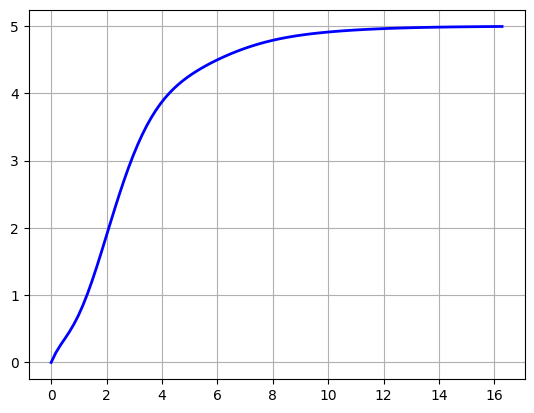

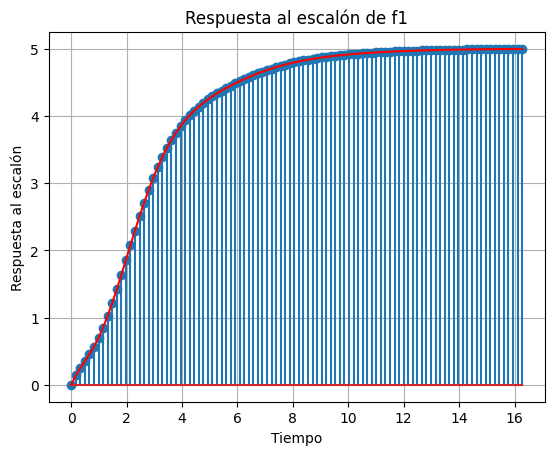

In [3]:
#Imprimir polos y ceros
print(f"Los polos de f1 son: \n{f1.poles}")
print("=============================")
print(f"Los ceros de f1 son: \n{f1.zeros}")
print("=============================")

#Respuesta al escalón
t1, y1 = signal.step(f1)
plt.plot(t1, y1, 'b', linewidth=2)
plt.grid()
plt.show()
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al escalón')
plt.title('Respuesta al escalón de f1')

#Respuesta al escalon para discreto

plt.stem(t1,y1)
plt.plot(t1,y1,'r')
plt.grid()
plt.show()


## 2.- Espacio de estados

Es posible pasar de funciones de transferencia a espacio de estados de forma sencilla, por medio del método **to_ss()**. O bien, definir un sistema lineal por espacio de estados directamente.

In [4]:
#para pasar de función de transferencia a espacio de estados
s1 = f1.to_ss()
print(s1)
print("==========================")

#Imprimir los polos y los ceros de la función de transferencia
print(f"Los polos de f1 son: \n{f1.poles}")
print(f"Los ceros de f1 son: \n{f1.zeros}")
print("=============================")

#Comprobamos el sistema que hicimos en MAtlab
num = [0.95, 0, 2]
den = [0.817, 2.128, 5.045, 4.48, 3]
f3 = signal.TransferFunction(num, den)
s3 = f3.to_ss()
print(s3)
print("==============================")



StateSpaceContinuous(
array([[-2., -3., -1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]]),
array([[1.],
       [0.],
       [0.]]),
array([[1., 0., 5.]]),
array([[0.]]),
dt: None
)
Los polos de f1 son: 
[-0.78492015+1.30714128j -0.78492015-1.30714128j -0.43015971+0.j        ]
Los ceros de f1 son: 
[-0.+2.23606798j  0.-2.23606798j]
StateSpaceContinuous(
array([[-2.60465116, -6.1750306 , -5.48347613, -3.67197062],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ]]),
array([[1.],
       [0.],
       [0.],
       [0.]]),
array([[0.        , 1.1627907 , 0.        , 2.44798042]]),
array([[0.]]),
dt: None
)


In [5]:
#Pasamos a pasar de espacio d eestados a funcion de transferencia
A = np.array([[-2, -1], [1, 0]])
B = np.array([[1], [0]])
C = np.array([1, 2])
D = np.array([0]) # Si es 0 es constante en el tiempo distintoas entonces varia en el

#Creamos el sistema en espacio de estados
s3 = signal.StateSpace(A, B, C, D)
print(s3)
print("===========================")
print(f"Los polos de s3 son: \n{s3.poles}")
print(f"Los ceros de s3 son: \n{s3.zeros}")

f4 = s3.to_tf()
print(f4)

StateSpaceContinuous(
array([[-2, -1],
       [ 1,  0]]),
array([[1],
       [0]]),
array([[1, 2]]),
array([[0]]),
dt: None
)
Los polos de s3 son: 
[-1. -1.]
Los ceros de s3 son: 
[-2.]
TransferFunctionContinuous(
array([1., 2.]),
array([1., 2., 1.]),
dt: None
)


c:\Users\Helexium\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_filter_design.py:1109: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)
c:\Users\Helexium\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


Por medio de la función **odeint** es posible crear un sistema en espacio de estados y evaluar su respuesta, de forma similar a como se vió en clases anteriores.

In [6]:
from scipy.integrate import odeint

Como primer paso, se define una función que represente al sistema.

In [33]:
#vamos a crear un sistema en espacio de estados de 3x3
def sistema(x,t,r1,r2,r3, k):
  #Extraer estados, Error en estado estable en un proporcional
  x1,x2,x3 = x

  #dinamca del sistema
  a = np.array([[1,0,0], [0,1,0], [0,0,1]])
  b = np.array([[1],[1],[1]])

  #Definir el error
  e = x[:,np.newaxis] - np.array([[r1],[r2],[r3]])

  #Entrada del controlador
  kp = k
  u = kp * e

  #Ecuación del espacio de estado x'=ax+bu
  dx = np.dot(a,x[:, np.newaxis]-b*u)
  return dx[:,0]




Se definen las condiciones iniciales del sistema

In [41]:
#Definimos las condiciones iniciales de los 3 estados
x0 = [5,4,7]

#Definimos las referencias
r1 = 8
r2 = 3
r3 = 5

#Definimos el vector de tiempo
t = np.linspace(0,10,100)

Finalmente, evaluamos la respuesta del sistema

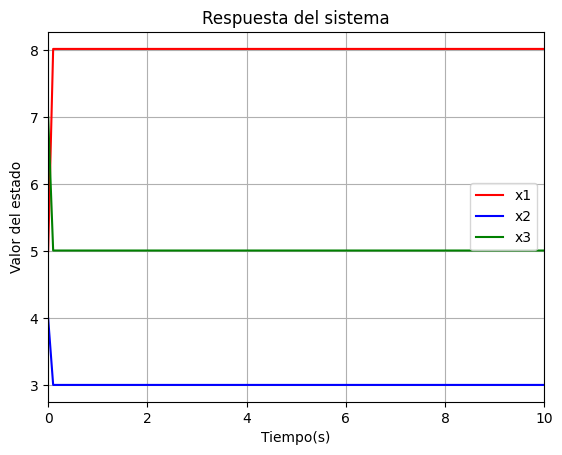

In [43]:
#Solucionamos el sistema
sol = odeint(sistema, x0, t, args=(r1,r2,r3, 500))

#Graficamos
plt.figure(1)
plt.title('Respuesta del sistema')
plt.plot(t,sol[:,0],'r',label='x1')
plt.plot(t,sol[:,1],'b',label='x2')
plt.plot(t,sol[:,2],'g',label='x3')
plt.legend()
plt.grid()
plt.xlim([0,10])
plt.xlabel('Tiempo(s)')
plt.ylabel('Valor del estado')
plt.show()